# 03-1 k-최근접 이웃 회귀
### 지도 학습의 한 종류인 회귀 문제 이해 및 과대적합과 과소적합의 이해
---
</br>

💡용어 정리💡  
❓ 회귀 ➡️ 두 변수 사이의 상관관계를 분석하는 방법, 임의의 어떤 숫자를 예측함  
❓ 과대적합 ➡️ 훈련 세트 점수 >>>>>> 테스트 세트 점수   
 --> 훈련 세트에만 잘 맞는 모델, 실전에선 잘 동작하지 않음  
❓ 과소적합 ➡️ 훈련 세트 점수 < 테스트 세트 점수, 두 점수가 모두 낮은 경우  
 --> 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않음!   
 --> 훈련 세트와 테스트 세트의 양이 적어도 발생 가능 

**1) 농어 데이터 입력**
- 원래는 파이썬 리스트 -> 넘파이 배열  
- 처음부터 넘파이 array() 이용해서 넘파이 배열 생성

In [ ]:
import numpy as np

# 넘파이 배열로 농어의 길이와 무게 정보 생성 (1차원 배열)
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

**농어 데이터 산점도 생성**

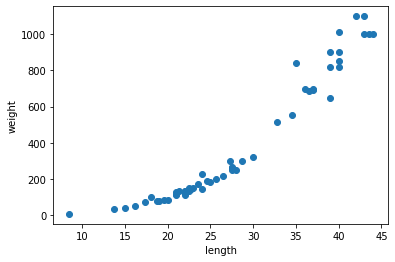

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**2) 테스트 세트와 훈련 세트로 데이터 나누기**

In [ ]:
# 사이킷런의 train_test_split 이용하여 데이터 분할
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

**reshape() 예시**

In [ ]:
# 1차원 배열의 크기는 원소의 갯수 --> 4
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

# reshape() 이용해서 배열의 크기 지정 --> (2, 2)
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(4,)
(2, 2)


**3) 특성 데이터 2차원 배열로 생성**
- 사이킷런에 사용할 훈련 세트는 2차원 배열이어야함!  
- reshape(-1, 1) 에서 -1이란? --> 나머지 원소 개수로 모두 채움  

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


**4) 클래스 객채 생성 및 모델 훈련**
- 회귀 모델에서는 정확한 숫자를 맞히는것은 거의 불가능  
- 평가 결과 값 --> 결정계수 or R^2  

In [ ]:
# k-최근점 이웃 회귀 알고리즘 구현 클래스
from sklearn.neighbors import KNeighborsRegressor

# 객체 생성
knr = KNeighborsRegressor()

# 모델 훈련
knr.fit(train_input, train_target)

# 모델 평가 (테스트 세트)
print(knr.score(test_input, test_target))

0.992809406101064


**타깃과 예측의 절댓값 오차 평균**

In [ ]:
# mean_absolute_error 타깃과 예측의 절댓값 오차를 평균하여 반환함
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 생성
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction) # (타깃, 예측)
print(mae)

19.157142857142862


**훔련 세트 모델 평가**
- 훈련 세트 < 테스트 세트 --> 과소적합  

In [ ]:
# 모델 평가 (훈련 세트) --> 테스트 세트의 점수보다 낮음! 
print(knr.score(train_input, train_target))

0.9698823289099254


**훈련 세트의 점수를 더 높이기 위해 이웃 개수 재설정 및 재훈련**
- 훈련 세트의 점수를 더 높이기 위해서는 모델을 훈련 세트에 더 알맞게 훈련 시키면 됨!  
 --> 모델을 조금 더 복잡하게 설정!  
- k-최근점 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은? **이웃의 개수 k를 줄이는 것!**    
 --> 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해짐  
 (이웃의 개수를 늘이면, 데이터 전반의 일반적인 패턴을 따름)

In [ ]:
# 이웃의 개수를 3으로 설정
# k-최근접 이웃 알고리즘의 기본 k 값은 5
knr.n_neighbors = 3

# 모델 재훈련
knr.fit(train_input, train_target)

# 훈련 세트 > 테스트 세트
# k 값을 줄임 --> 훈련 세트의 R^2 점수가 높아짐
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609
